## Gold Price Prediction

In [1]:
# Importing libraries...

import pandas as pd
import numpy as np
from datetime import datetime, time
import matplotlib.pyplot as plt
import seaborn as sns

!pip install statsmodels
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

!pip install pmdarima
import pmdarima as pm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.tsa.statespace import sarimax 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [4]:
df = pd.read_csv("/content/sample_data/Gold_data.csv")

In [5]:
df

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [6]:
df.shape

(2182, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2182 non-null   object 
 1   price   2182 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.2+ KB


In [8]:
#Date column is in object dtype. we will convert it into Datetime.

df['date'] = pd.to_datetime(df['date'])
df

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2182 non-null   datetime64[ns]
 1   price   2182 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 34.2 KB


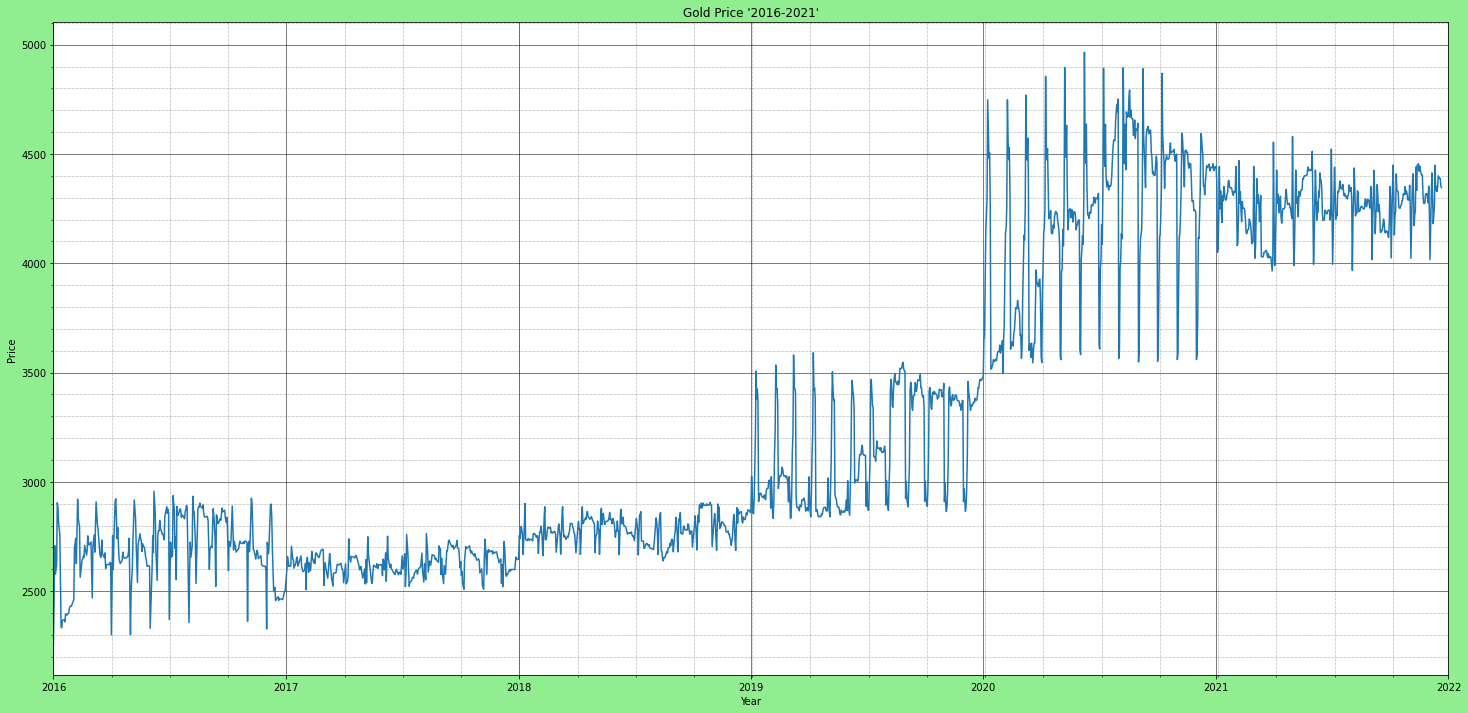

In [11]:
#line plot of day and price

fig, ax = plt.subplots(figsize=(25,12), facecolor='lightgreen')
sns.lineplot(data=df, x='date', y='price')
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-',linewidth=0.5,color='black')
ax.grid(which='minor',linestyle=':',linewidth=0.5,color='black',alpha=0.7)
ax.set(title = "Gold Price '2016-2021'",
      xlabel = "Year",
      ylabel = "Price");
ax.set_xlim([datetime(2016,1,1), datetime(2022,1,1)]);

In [12]:
#resampling data with mean of year,month,quarter

df_resample_y = df.resample(rule='Y', on='date').mean()
df_resample_m = df.resample(rule='M', on='date').mean()
df_resample_q = df.resample(rule='Q', on='date').mean()

In [13]:
df_resample_y['price']

date
2016-12-31    2690.614162
2017-12-31    2626.676484
2018-12-31    2781.938082
2019-12-31    3150.210685
2020-12-31    4216.378689
2021-12-31    4266.871549
Freq: A-DEC, Name: price, dtype: float64

In [14]:
df_resample_m['price']

date
2016-01-31    2495.832258
2016-02-29    2688.703448
2016-03-31    2682.854839
2016-04-30    2677.790000
2016-05-31    2677.650000
                 ...     
2021-08-31    4264.919355
2021-09-30    4207.506667
2021-10-31    4289.148387
2021-11-30    4327.633333
2021-12-31    4312.733333
Freq: M, Name: price, Length: 72, dtype: float64

In [19]:
df_resample_q['price']

date
2016-03-31    2621.007692
2016-06-30    2700.096154
2016-09-30    2788.126630
2016-12-31    2652.572645
2017-03-31    2622.654630
2017-06-30    2611.393407
2017-09-30    2636.719022
2017-12-31    2635.685326
2018-03-31    2760.522222
2018-06-30    2798.379670
2018-09-30    2745.982065
2018-12-31    2822.581522
2019-03-31    3023.345556
2019-06-30    3015.557143
2019-09-30    3266.105435
2019-12-31    3291.613043
2020-03-31    3873.320879
2020-06-30    4215.295604
2020-09-30    4428.619565
2020-12-31    4344.538043
2021-03-31    4210.840000
2021-06-30    4290.093407
2021-09-30    4260.927174
2021-12-31    4309.268293
Freq: Q-DEC, Name: price, dtype: float64

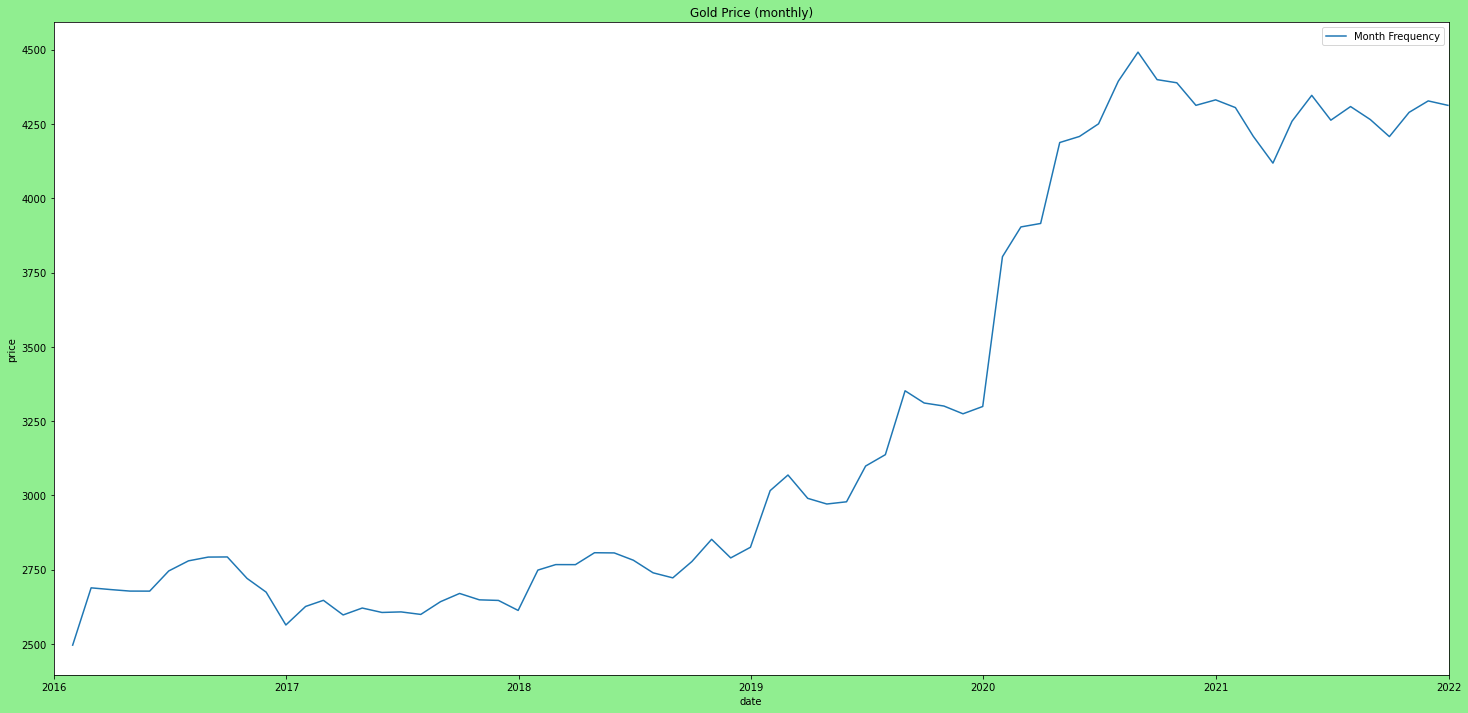

In [20]:
#line plots for months = months

fig,ax = plt.subplots(figsize=(25,12),facecolor='lightgreen')
sns.lineplot(data=df_resample_m, x='date',y='price',label='Month Frequency')
ax.set(title = 'Gold Price (monthly)')
ax.set_xlim([datetime(2016,1,1), datetime(2022,1,1)]);

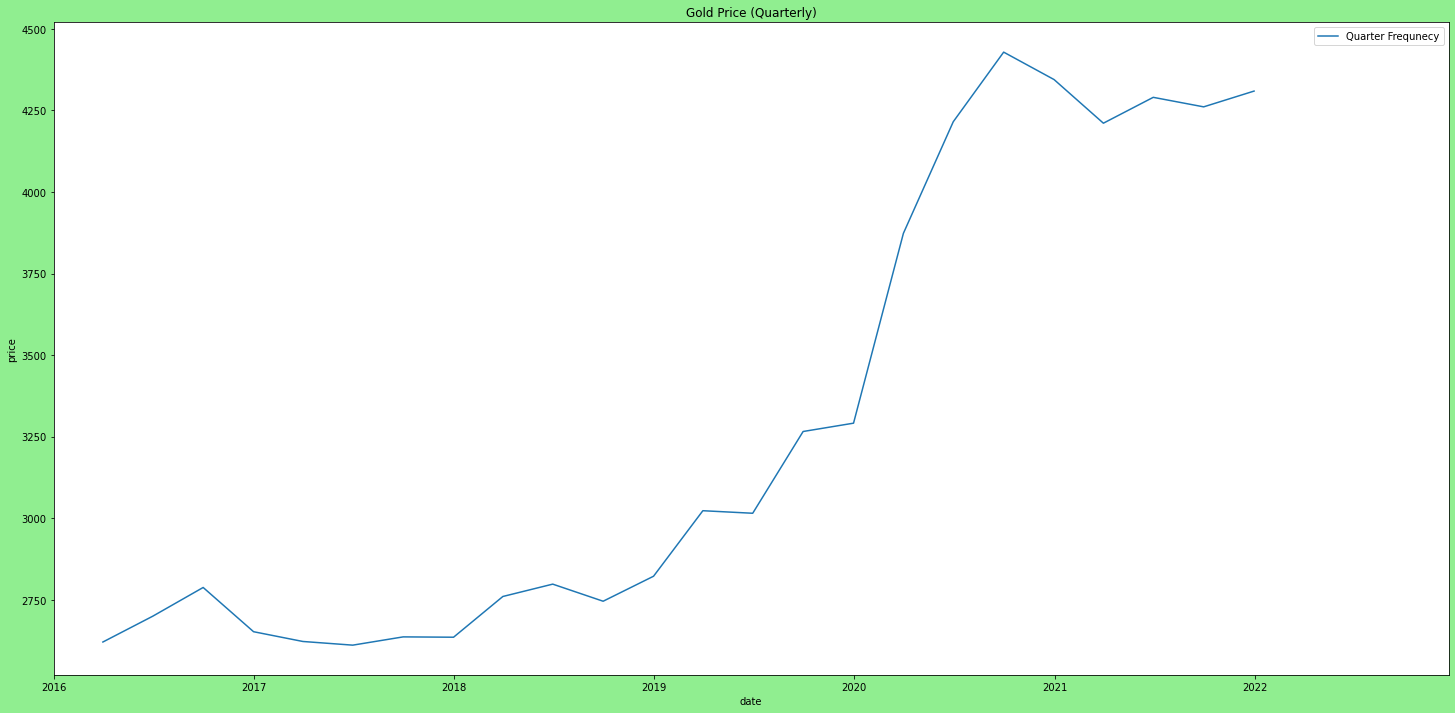

In [22]:
#line plots for months = quarter

fig, ax = plt.subplots(figsize=(25,12),facecolor='lightgreen')
sns.lineplot(data=df_resample_q,x='date',y='price',label='Quarter Frequnecy')
ax.set(title='Gold Price (Quarterly)')
ax.set_xlim([datetime(2016,1,1), datetime(2022,12,21)]);

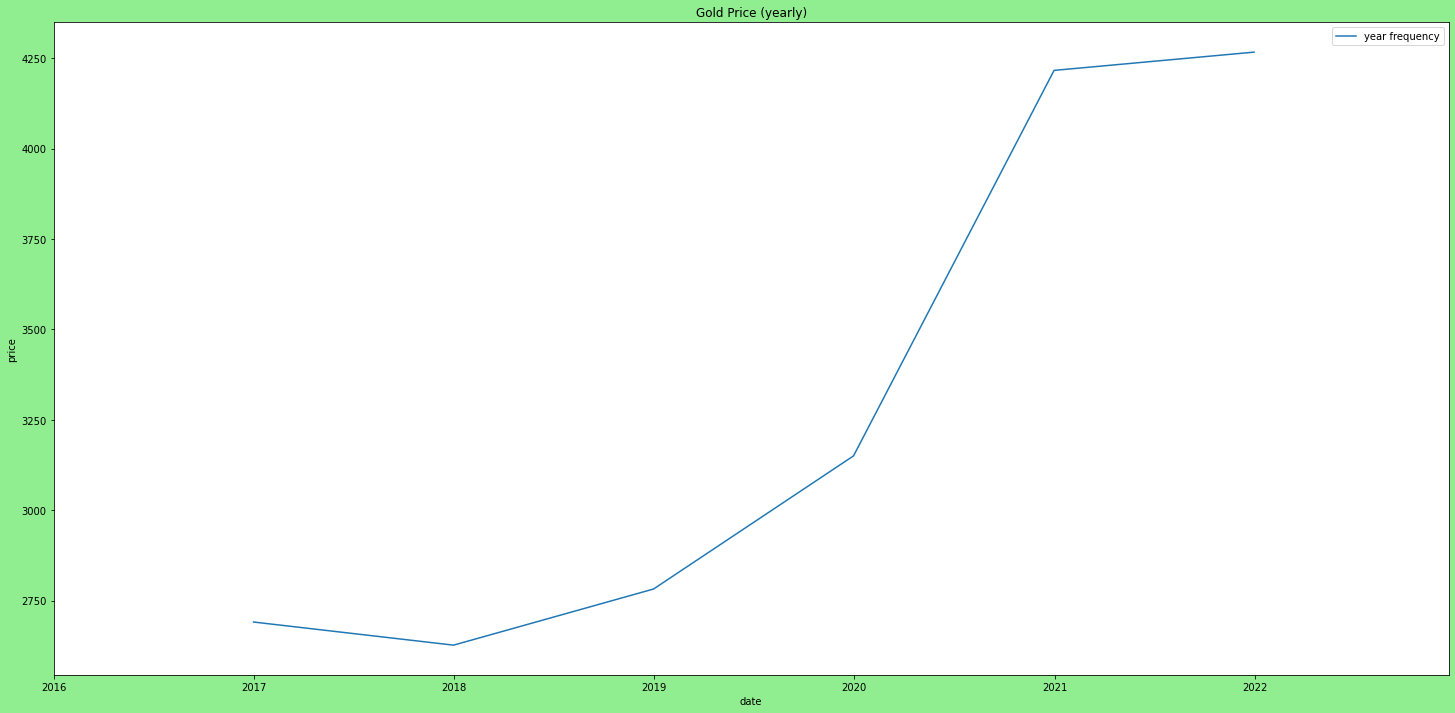

In [18]:
#line plots for months = yearly

fig,ax = plt.subplots(figsize=(25,12),facecolor='lightgreen')
sns.lineplot(data=df_resample_y, x='date',y='price', label='year frequency')
ax.set(title='Gold Price (yearly)')
ax.set_xlim([datetime(2016,1,1), datetime(2022,12,21)]);

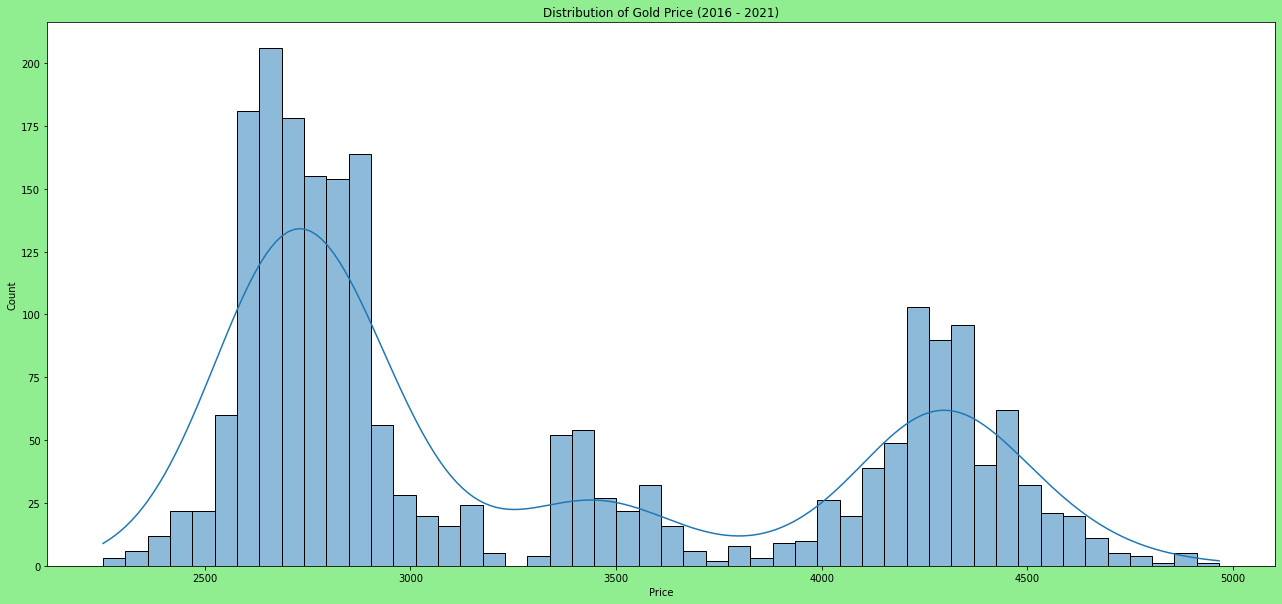

In [26]:
#Histogram of price

fig = plt.figure(figsize=(22,10),facecolor='lightgreen')
sns.histplot(df['price'],bins=50,kde=True)
plt.title("Distribution of Gold Price (2016 - 2021)")
plt.xlabel("Price")
plt.ylabel("Count");


In [38]:
# Making 'date' column as index of the dataset

df1 = df.copy()
df1.set_index("date", inplace = True)
df1.drop(["year", "month", "day"], axis = 1, inplace = True)
df1.head()

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75


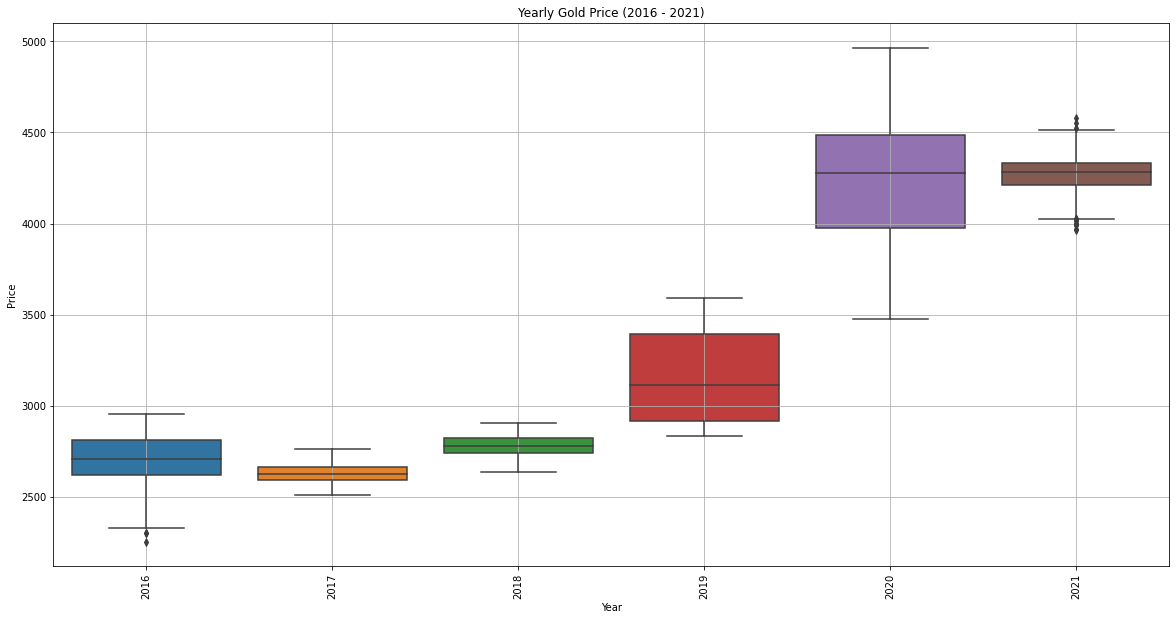

In [40]:
# Boxplot for Yearly Gold Price

_, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x = df1.index.year ,y = df1.price, ax=ax)
plt.title("Yearly Gold Price (2016 - 2021)")
plt.xlabel("Year")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.grid();

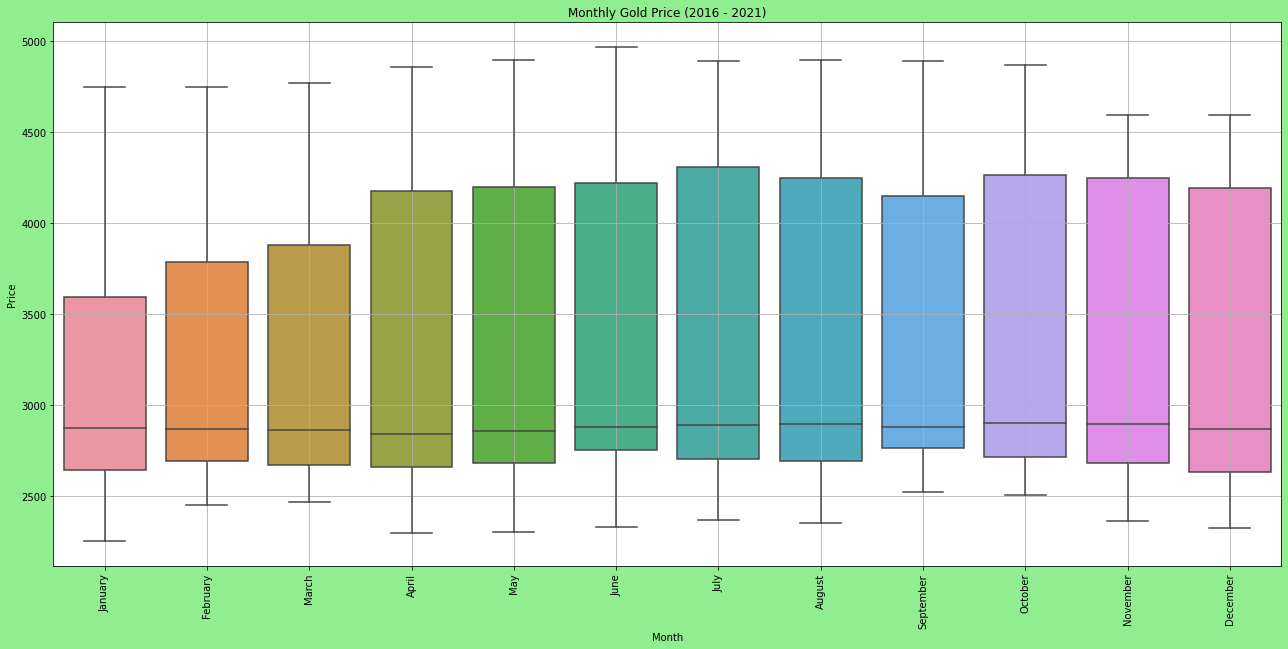

In [41]:
#Boxplot for monthly gold price
_, ax =  plt.subplots(figsize=(22,10),facecolor='lightgreen')
sns.boxplot(x=df1.index.month_name(), y=df1.price, ax=ax)
plt.title("Monthly Gold Price (2016 - 2021)")
plt.xlabel("Month")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.grid();

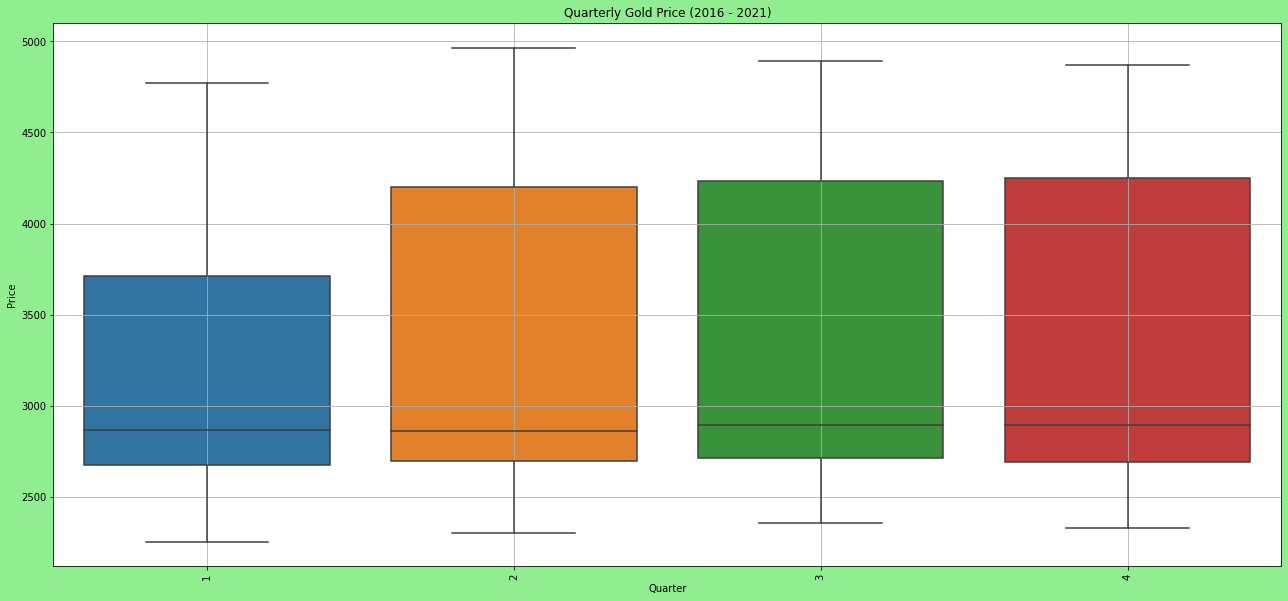

In [43]:
#Boxplot for quarterly gold price
_, ax = plt.subplots(figsize=(22,10),facecolor='lightgreen')
sns.boxplot(x=df1.index.quarter, y=df1.price, ax=ax)
plt.title("Quarterly Gold Price (2016 - 2021)")
plt.xlabel("Quarter")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.grid();

**Trend, seasonality and Residual Plots**

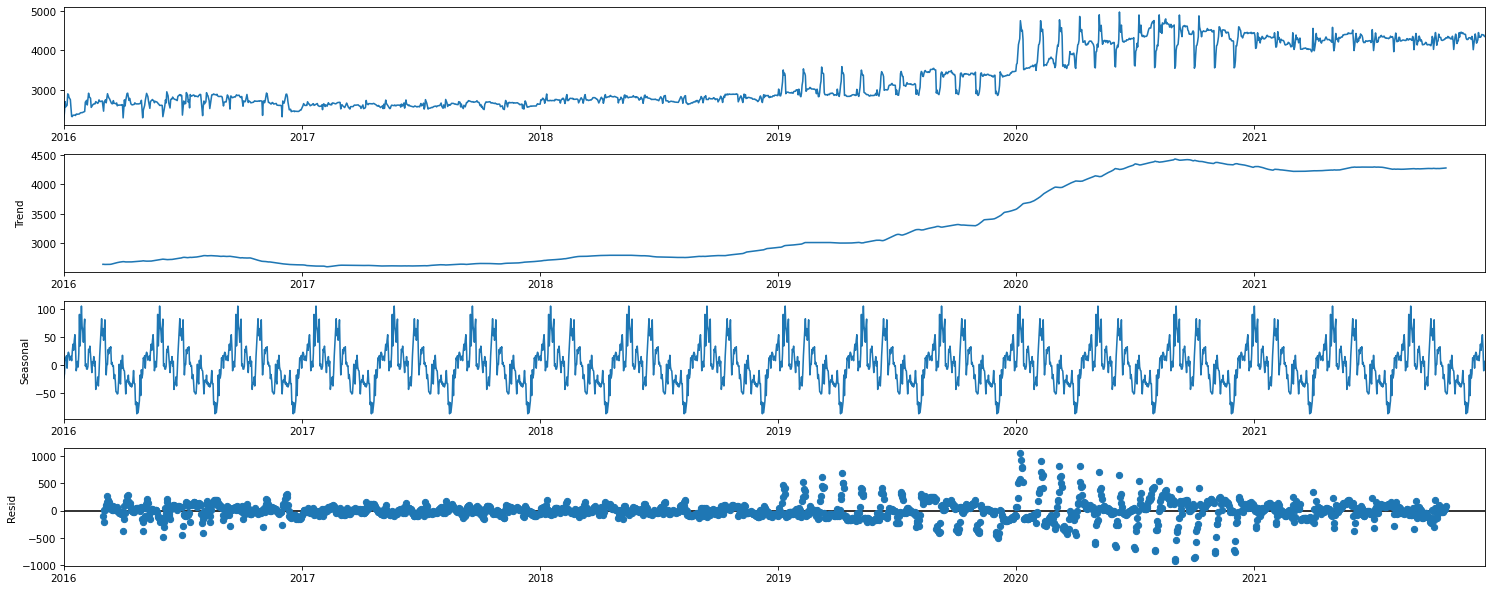

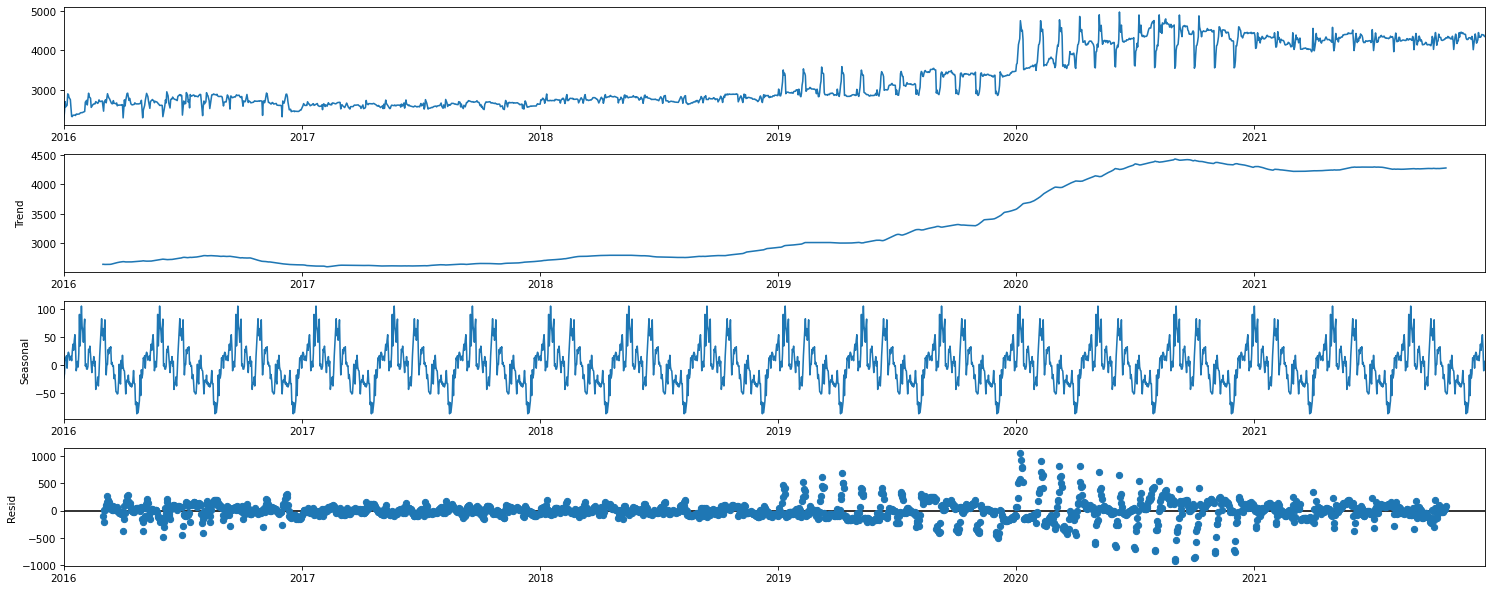

In [48]:
# Seasonal decompose plot for year 2016 - 2021

plt.rcParams.update({'figure.figsize':(20,8), 'figure.dpi':75})
result = seasonal_decompose(df1, model='additive', period=120)
result.plot()

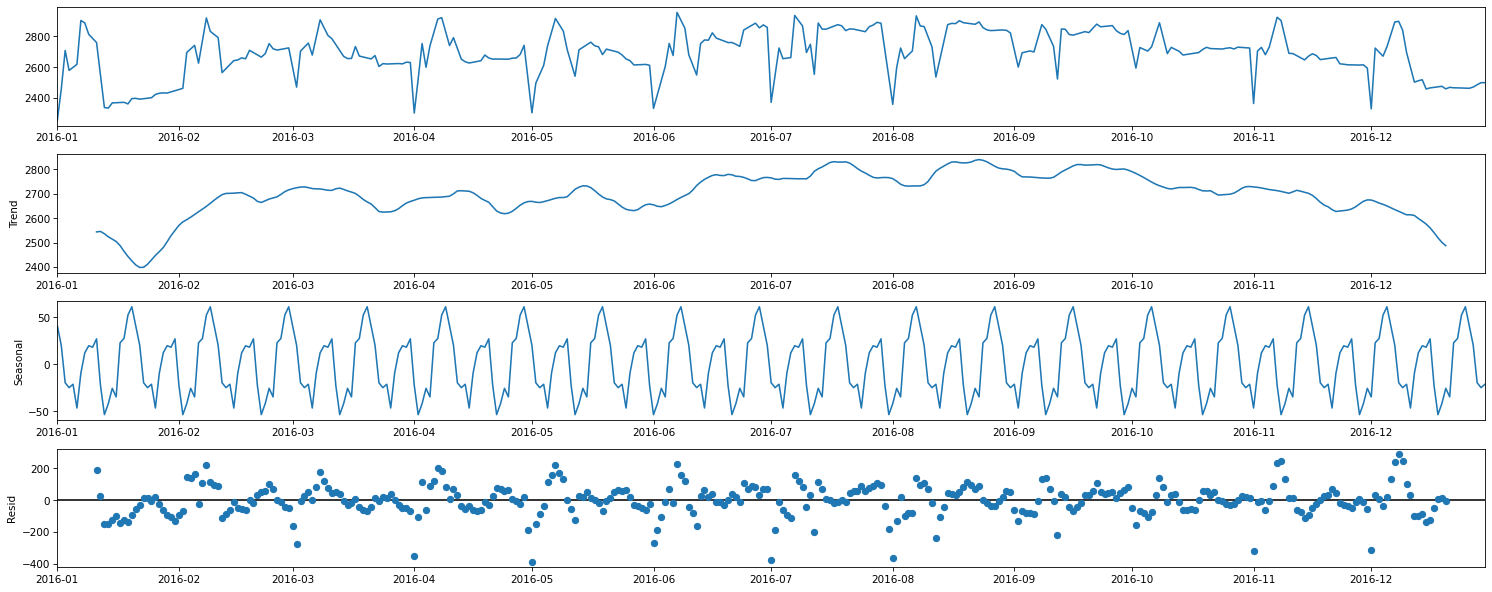

In [50]:
# Seasonal decompose plot for year 2016

plt.rcParams.update({'figure.figsize':(20,8), 'figure.dpi':75})
result = seasonal_decompose(df1[:365], model='additive', period=20)
result.plot()
plt.show()

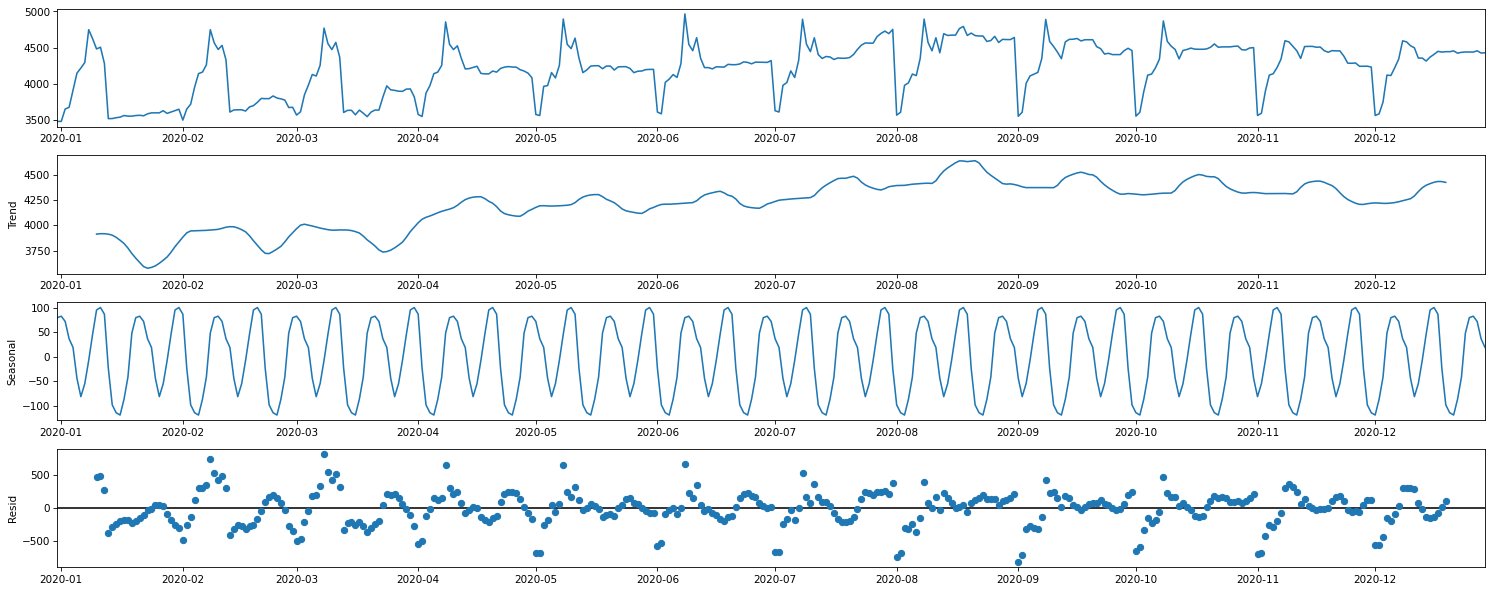

In [53]:
# Seasonal dcompose plot for year 2020

plt.rcParams.update({'figure.figsize':(20,8), 'figure.dpi':75})
result = seasonal_decompose(df1[365*4:365*5], model='additive', period=20)
result.plot()
plt.show()

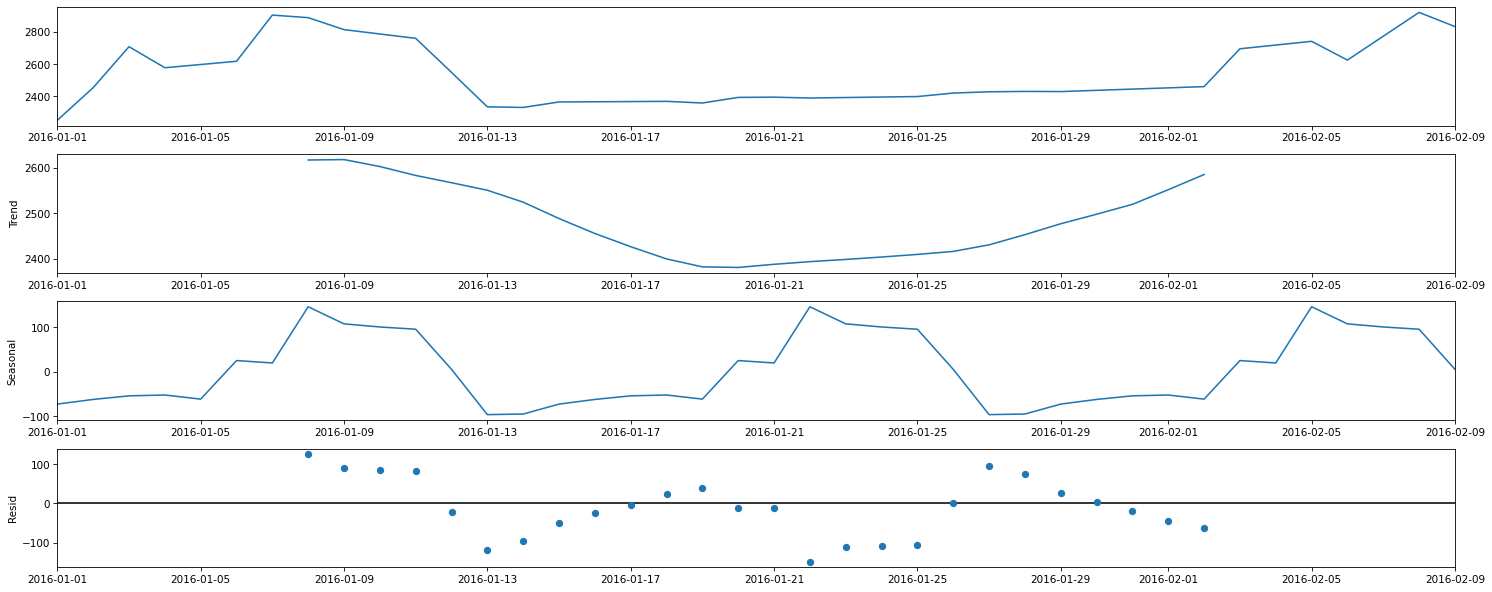

In [55]:
# Seasonality check (weekly) in January 2016

plt.rcParams.update({'figure.figsize':(20,8), 'figure.dpi':75})
result = seasonal_decompose(df1[:40], model='additive', period=14)
result.plot();

**After observing above plots, we can say that our data follows seasonality**.


*   Data follows increasing trend.
*   Data has monthly,yearly and weekly(2weeks) seasonality.
*   Price Fluctates more in year 2020.
*   The price mostly lie between 2500-3000 and 4000-4700.
*   There is sharp hike in price after 2020.



 **Check for Stationarity using Augmented Dickey-Fuller (ADF) test**

H0 : The data is non-stationary ( The data have a time dependent structure )

H1 : The data is stationary ( The data does not have a time dependent structure

*   Rejection Criteria ==> H0 if p < 0.05

In [56]:
#ADH test to check stationarity

result = adfuller(df1, autolag='AIC')


print(f'ADF Statistic: {result[0]:.3f}')
print(f'p-value: {result[1]:.3f}')

for key, value in result[4].items():
    print(f'Critical values({key}): {value:.3f}')
    
if result[0]<result[4]['1%']:
    print("Dataset is stationary!")
    


stat, p, lags, obs, crit, t = adfuller(df1)
print(f'stat: {stat:.5f}\np-value: {p:.5f}')

if p > 0.05:
    print('Probably not Stationary')
else:
    print('Probably Stationary')

ADF Statistic: -0.310
p-value: 0.924
Critical values(1%): -3.433
Critical values(5%): -2.863
Critical values(10%): -2.567
stat: -0.30990
p-value: 0.92409
Probably not Stationary


In [57]:
# Differencing to make time-series Stationary

df2 = df1.diff(1).dropna()

result = adfuller(df2, autolag="AIC")

print(f'ADF Statistic: {result[0]:.3f}')
print(f'p-value: {result[1]:.3f}')

for key, value in result[4].items():
    print(f'Critical values({key}): {value:.3f}')
    
if result[0]<result[4]['1%']:
    print("Dataset is stationary!")
    


stat, p, lags, obs, crit, t = adfuller(df2)
print(f'stat: {stat:.5f}\np-value: {p:.5f}')

if p > 0.05:
    print('Probably not Stationary')
else:
    print('Probably Stationary')

ADF Statistic: -21.665
p-value: 0.000
Critical values(1%): -3.433
Critical values(5%): -2.863
Critical values(10%): -2.567
Dataset is stationary!
stat: -21.66454
p-value: 0.00000
Probably Stationary


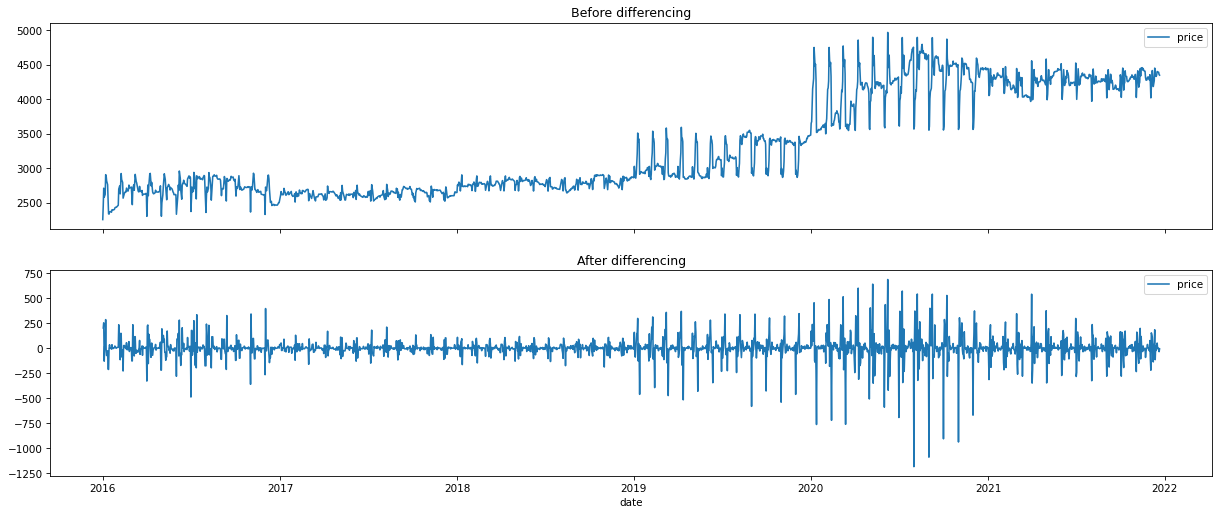

In [59]:
# Lineplot before and after differencing (2016 - 2021)

fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=(20,8),sharex=True)
sns.lineplot(data=df1, ax=ax1)
ax1.set_title("Before differencing")
sns.lineplot(data=df2, ax=ax2)
ax2.set_title("After differencing");                              
                              

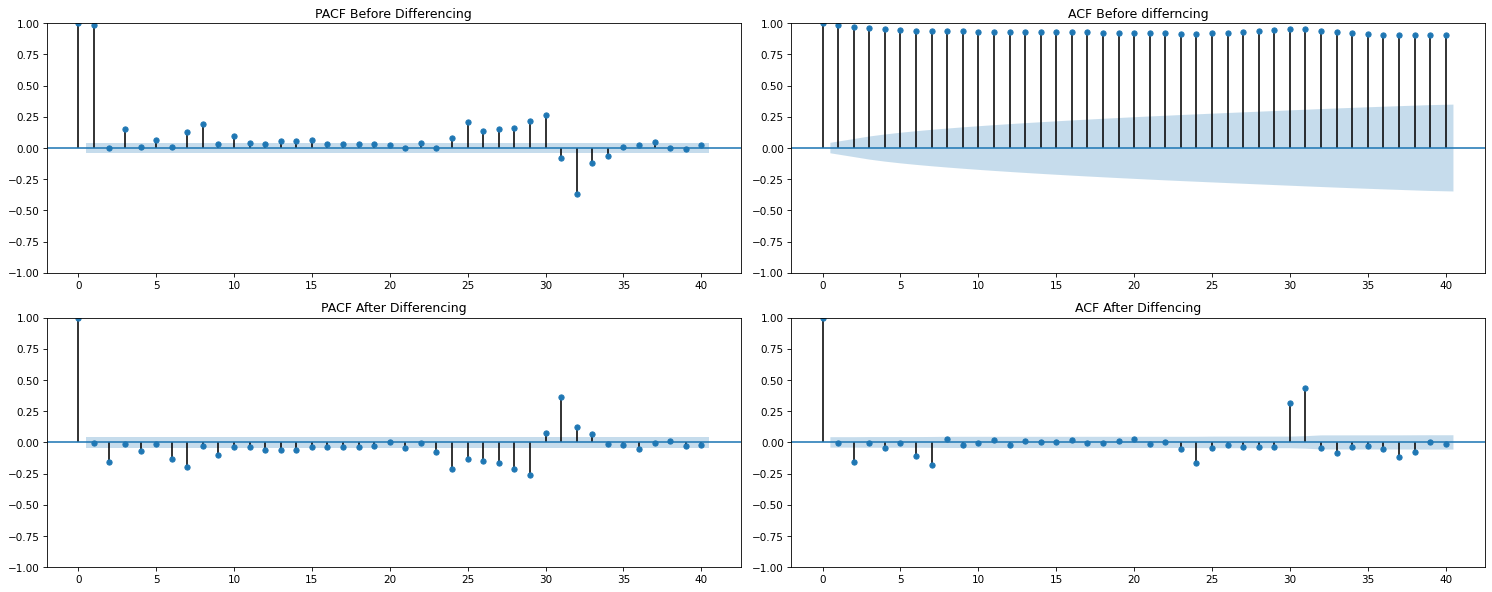

In [64]:
#ACF and PACF Comparison

fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(20,8))
plot_pacf(df1, lags=40, ax=axes[0,0], method='ols', title='PACF Before Differencing')
plot_acf(df1, lags=40, ax=axes[0,1], title='ACF Before differncing')

plot_pacf(df2, lags=40, ax=axes[1,0], method='ols', title='PACF After Differencing')
plot_acf(df2, lags=40, ax=axes[1,1], title='ACF After Diffencing')

plt.tight_layout();

**MODEL BUILDING**

Splitting the dataset into train and test.

We give 80% of the data to train and rest 20% to test.

We have 2182 rows: 80% of 2182 is 1745.6 ~= 1746.

In [65]:
x_train = df1[:1746]
x_test = df1[1746:]

In [66]:
x_train, x_test

(              price
 date               
 2016-01-01  2252.60
 2016-01-02  2454.50
 2016-01-03  2708.10
 2016-01-04  2577.80
 2016-01-05  2597.75
 ...             ...
 2020-10-07  4341.10
 2020-10-08  4869.10
 2020-10-09  4586.40
 2020-10-10  4519.30
 2020-10-11  4473.60
 
 [1746 rows x 1 columns],              price
 date              
 2020-10-12  4343.3
 2020-10-13  4460.7
 2020-10-14  4473.4
 2020-10-15  4493.3
 2020-10-16  4478.6
 ...            ...
 2021-12-17  4394.4
 2021-12-18  4389.5
 2021-12-19  4389.5
 2021-12-20  4354.1
 2021-12-21  4346.5
 
 [436 rows x 1 columns])

In [68]:
#function to calculate MAPE and RMSE

def forecast_accuracy(forecast,actual):
  mape = np.mean(np.abs(forecast - actual)/np.abs(actual))*100
  rmse = np.sqrt(((forecast - actual)**2).mean())
  return {'Mean Absolute Percentage Error (%)':mape, 
            'Root Mean Squared Error':rmse}

**ARIMA MODEL**

In [69]:
auto_model = pm.auto_arima(x_train.price, d=1, start_p=0, start_q=0, max_p=6, max_q=6, n_jobs=-1)
                        

/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_validation.py:77: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


In [70]:
print(auto_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1746
Model:               SARIMAX(4, 1, 2)   Log Likelihood              -10630.415
Date:                Thu, 03 Nov 2022   AIC                          21276.831
Time:                        08:56:00   BIC                          21320.547
Sample:                    01-01-2016   HQIC                         21292.993
                         - 10-11-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2162      0.105      2.054      0.040       0.010       0.422
ar.L1          1.2854      0.095     13.521      0.000       1.099       1.472
ar.L2         -0.5066      0.084     -6.000      0.0

In [96]:
# Building ARIMA model of best parameters found by auto-arima
model = ARIMA(x_train["price"],
             order=(4,1,2))

# Fitting the model
model_fitted = model.fit();

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zero

In [97]:
# Predicting the data
preds = model_fitted.predict(start=0, end=len(df1)+1)
preds

2016-01-01       0.000000
2016-01-02    2252.445805
2016-01-03    2449.842042
2016-01-04    2682.915610
2016-01-05    2554.243165
                 ...     
2021-12-19    4364.862683
2021-12-20    4364.862683
2021-12-21    4364.862683
2021-12-22    4364.862683
2021-12-23    4364.862683
Freq: D, Name: predicted_mean, Length: 2184, dtype: float64

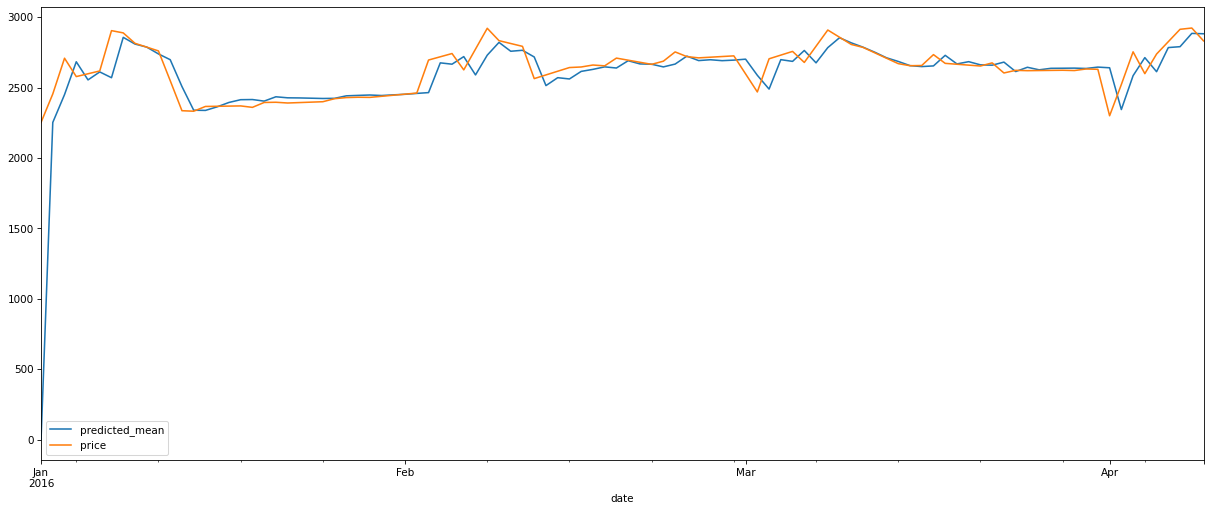

In [98]:
# Plotting train and prediction
preds[:100].plot(legend=True)
df1["price"][:100].plot(legend=True);

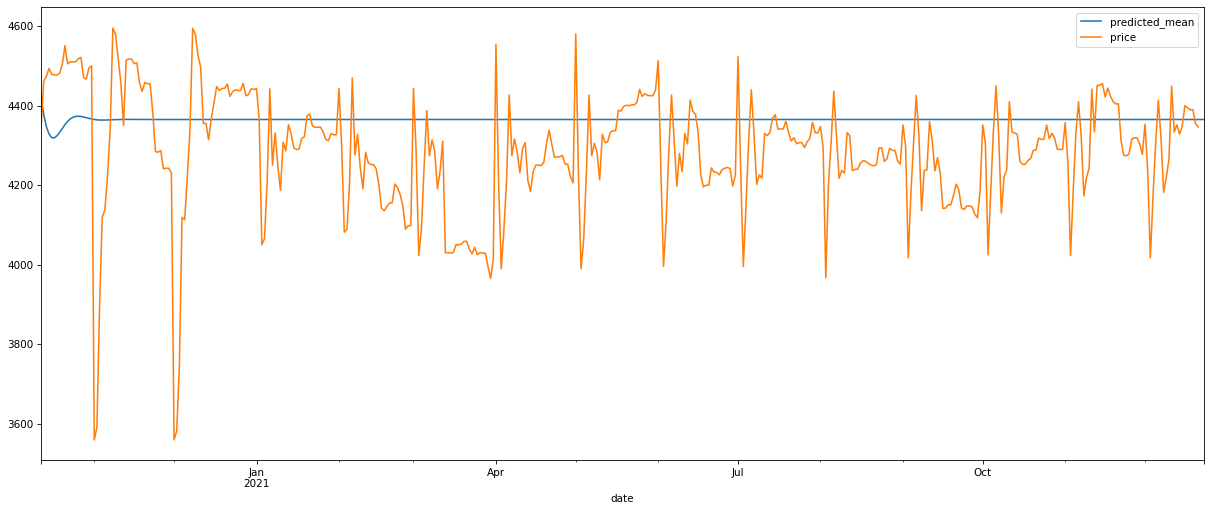

In [105]:
# Plotting test and predictions
preds[1746:].plot(legend=True)
x_test["price"].plot(legend=True);

In [101]:
preds

2016-01-01       0.000000
2016-01-02    2252.445805
2016-01-03    2449.842042
2016-01-04    2682.915610
2016-01-05    2554.243165
                 ...     
2021-12-19    4364.862683
2021-12-20    4364.862683
2021-12-21    4364.862683
2021-12-22    4364.862683
2021-12-23    4364.862683
Freq: D, Name: predicted_mean, Length: 2184, dtype: float64

In [102]:
# Train Accuracy
forecast_accuracy(preds[:1746], x_train["price"])

{'Mean Absolute Percentage Error (%)': 1.8274649216370187,
 'Root Mean Squared Error': 120.02518469869463}

In [103]:
# Test accuracy
forecast_accuracy(preds[1746:], x_test["price"])

{'Mean Absolute Percentage Error (%)': 3.003846864447682,
 'Root Mean Squared Error': 168.45770122910682}

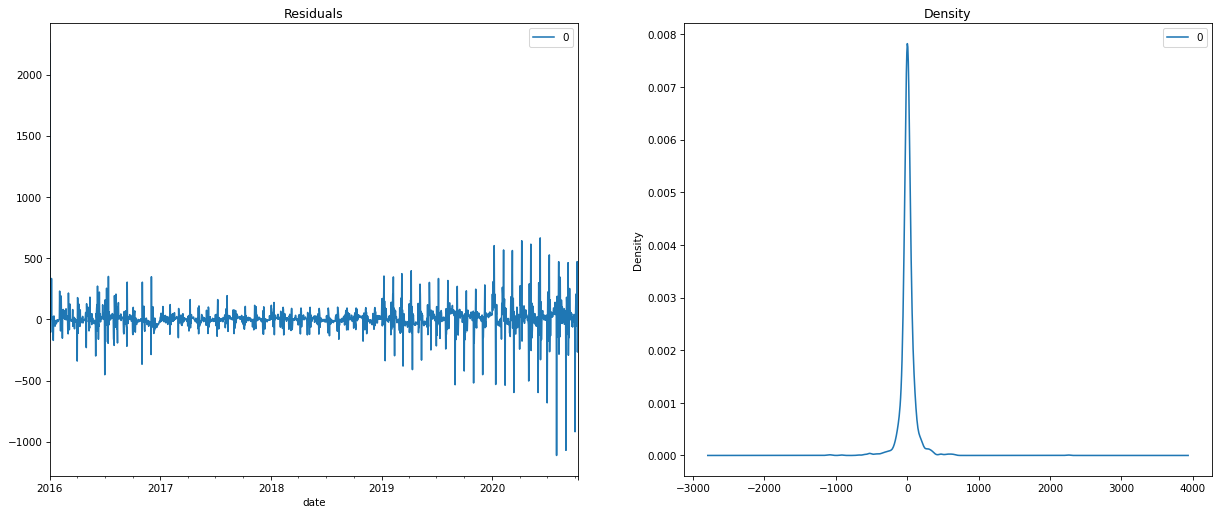

In [104]:

# Residual plot

residuals = pd.DataFrame(model_fitted.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1]);

**HOLT-WINTERS METHOD**

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


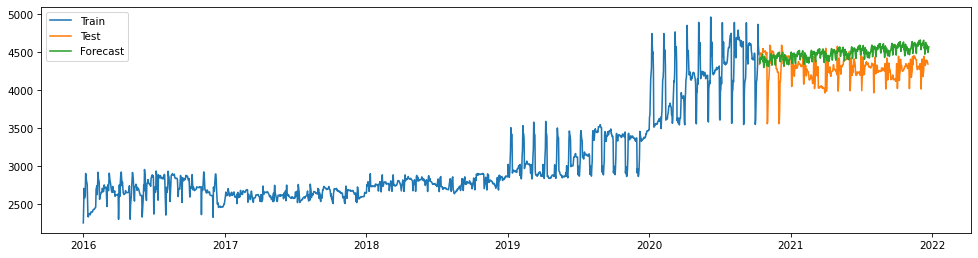

In [80]:
model_hw = ExponentialSmoothing(x_train, trend='add',seasonal_periods=52, seasonal='mul').fit()
forecast_hw = model_hw.predict(start=0, end=len(df1)+1)

plt.figure(figsize=(16,4))
plt.plot(x_train, label='Train')
plt.plot(x_test, label='Test')
plt.plot(forecast_hw[1746:], label='Forecast')
plt.legend(loc='best');

In [81]:
print(model_hw.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    price   No. Observations:                 1746
Model:             ExponentialSmoothing   SSE                       23724096.963
Optimized:                         True   AIC                          16728.541
Trend:                         Additive   BIC                          17034.585
Seasonal:                Multiplicative   AICC                         16732.598
Seasonal Periods:                    52   Date:                 Thu, 03 Nov 2022
Box-Cox:                          False   Time:                         09:05:37
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.9242856                alpha                 True
smoothing_trend          

In [82]:
# Calculating MAPE and RMSE

fc = model_hw.predict(start=0, end=len(df1)+1)
forecast_accuracy(forecast_hw, df1["price"])

{'Mean Absolute Percentage Error (%)': 2.6586397687734165,
 'Root Mean Squared Error': 159.0906706511398}

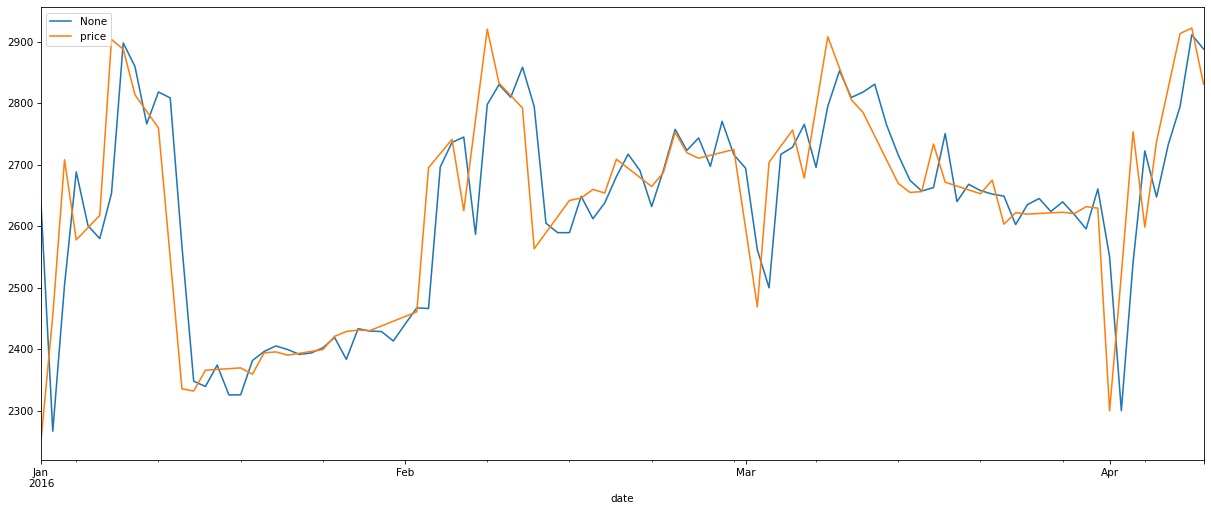

In [84]:
# Train predictions
forecast_hw[:100].plot(legend=True)
df1["price"][:100].plot(legend=True)

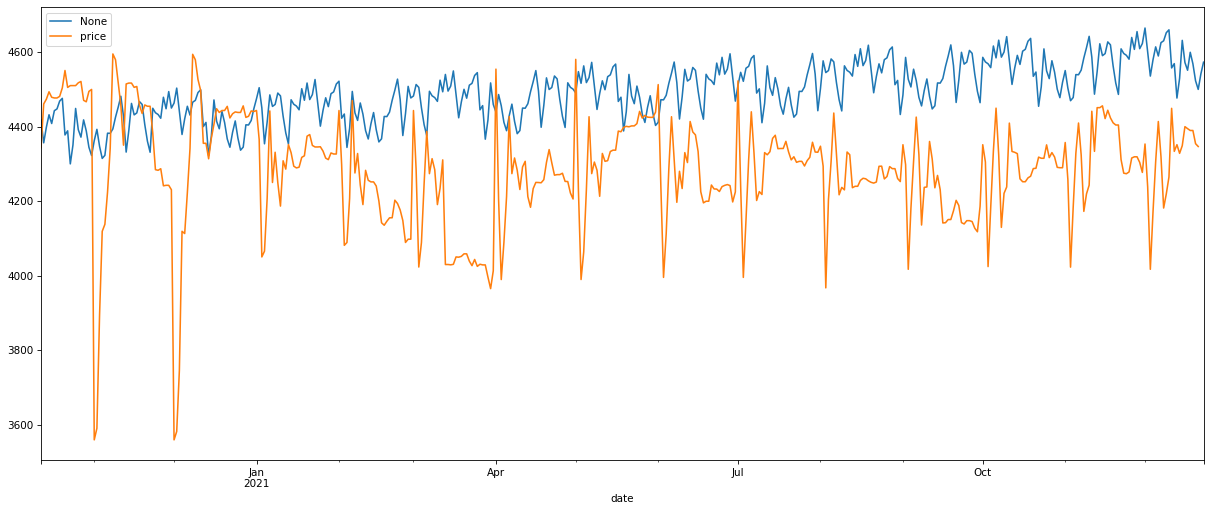

In [85]:
# Test predictions
fc[1746:].plot(legend=True)
x_test["price"].plot(legend=True);

**SARIMAX**

In [87]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sa_model = SARIMAX(x_train["price"], order=(4,1,2), seasonal_order=(4,0,2,12)).fit();


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization

In [88]:
print(sa_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              price   No. Observations:                 1746
Model:             SARIMAX(4, 1, 2)x(4, 0, 2, 12)   Log Likelihood              -10609.651
Date:                            Thu, 03 Nov 2022   AIC                          21245.303
Time:                                    09:10:14   BIC                          21316.341
Sample:                                01-01-2016   HQIC                         21271.567
                                     - 10-11-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7194      0.209      3.439      0.001       0.309       1.129
ar.L2         -0.0421      0.177   

In [89]:
preds = sa_model.predict(start=0, end=len(df1)+1)
preds

2016-01-01       0.000000
2016-01-02    2250.525125
2016-01-03    2435.688265
2016-01-04    2653.913822
2016-01-05    2544.055233
                 ...     
2021-12-19    4349.822920
2021-12-20    4380.222290
2021-12-21    4405.427913
2021-12-22    4419.206210
2021-12-23    4456.378061
Freq: D, Name: predicted_mean, Length: 2184, dtype: float64

In [90]:
# Calculating MAPE and RMSE

forecast_accuracy(preds, df1["price"])

{'Mean Absolute Percentage Error (%)': 2.173556707305035,
 'Root Mean Squared Error': 135.32279053678587}

In [91]:
print(forecast_accuracy(preds[:1746], x_train["price"]))
print(forecast_accuracy(preds[1746:], x_test["price"]))

{'Mean Absolute Percentage Error (%)': 1.8385936495367996, 'Root Mean Squared Error': 118.44629262273241}
{'Mean Absolute Percentage Error (%)': 3.514945466165903, 'Root Mean Squared Error': 188.3157901374742}


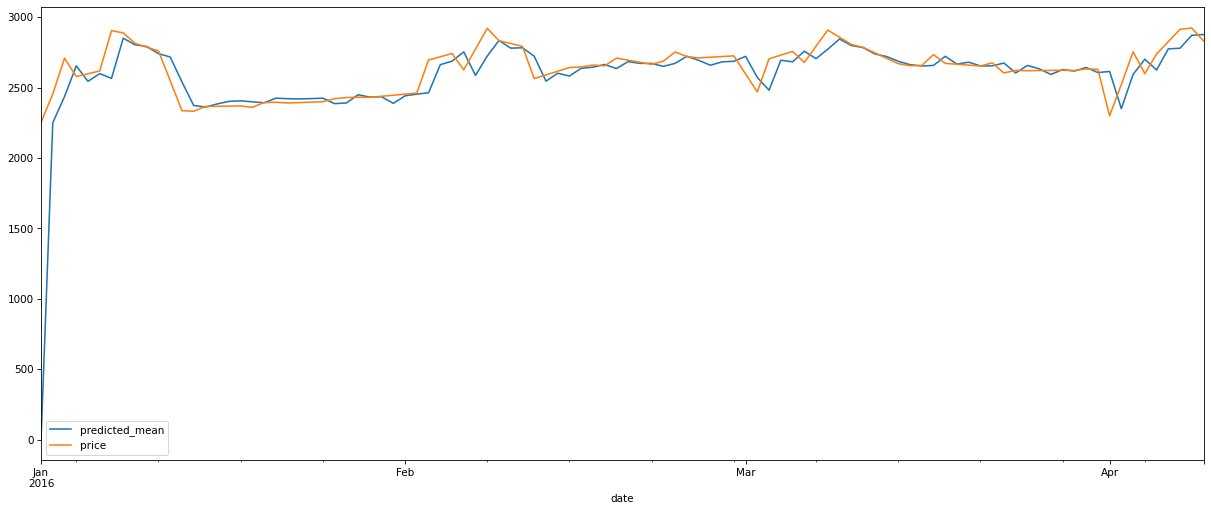

In [92]:
# Plotting train and prediction
preds[:100].plot(legend=True)
df1["price"][:100].plot(legend=True);

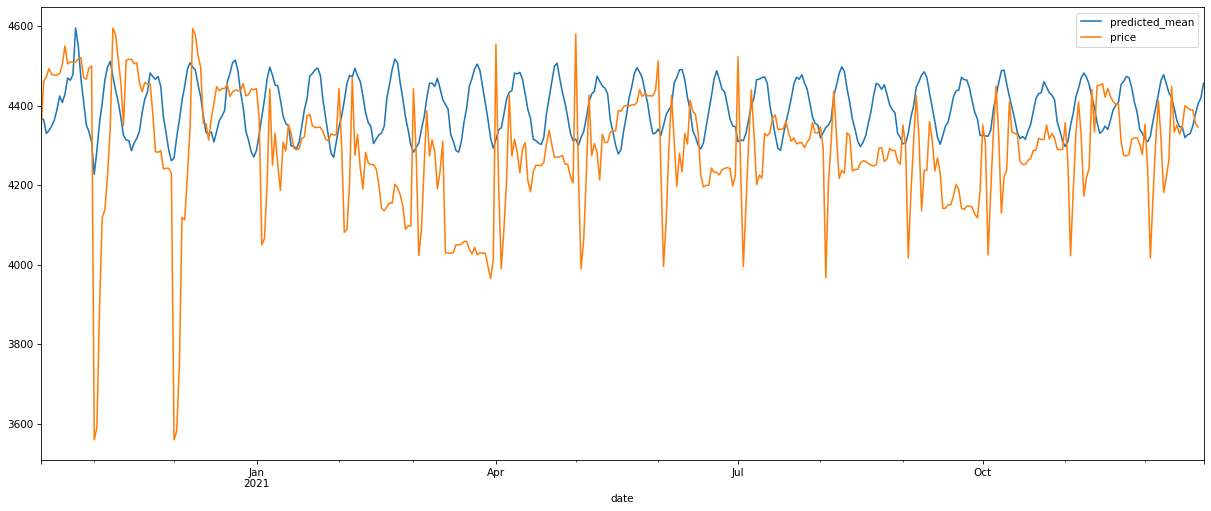

In [93]:
# Plotting test and prediction
preds[1746:].plot(legend=True)
x_test["price"].plot(legend=True);

In [94]:
# Saving SARIMAX model
import pickle
pickle.dump(sa_model, open("sarima-fitted-model.pickle", "wb"))